In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
df=pd.read_csv('SMSSpamCollection',sep='\t',names=['label','message'])

In [11]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [14]:
df['label']=df['label'].map({'ham':0,'spam':1})

In [15]:
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


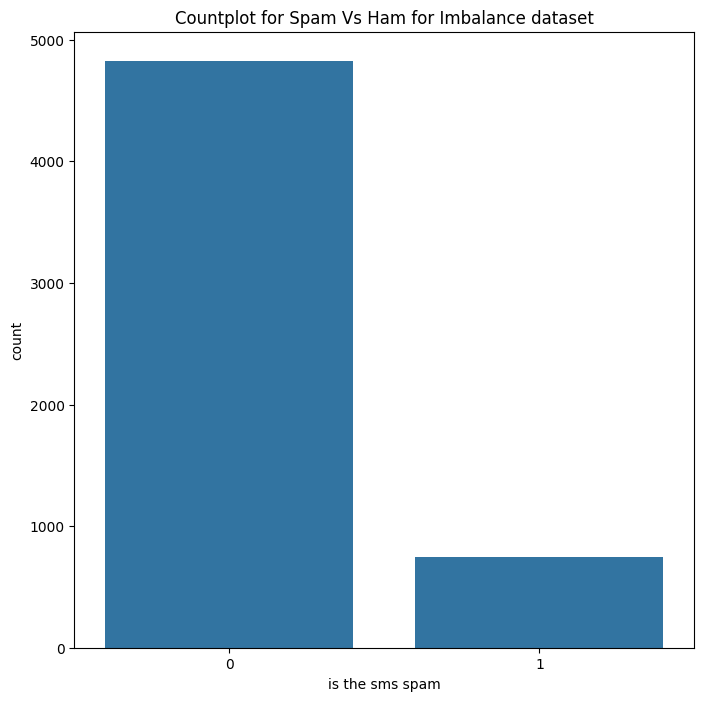

In [16]:
#countplot for spam vs ham for imbalance dataset

plt.figure(figsize=(8,8))
g=sns.countplot(x='label',data=df)
p=plt.title('Countplot for Spam Vs Ham for Imbalance dataset')
p=plt.xlabel('is the sms spam')

p=plt.ylabel('count')

In [17]:
only_spam=df[df['label']==1]

In [18]:
only_spam

,label,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [19]:
print("no of spam sms:",len(only_spam))
print('no of ham sms:',len(df)-len(only_spam))

no of spam sms: 747
no of ham sms: 4825


In [20]:
count = int((df.shape[0] - only_spam.shape[0]) / only_spam.shape[0])


In [21]:
count

6

In [22]:
for i in range(0,count-1):
    df=pd.concat([df,only_spam])

df.shape

(9307, 2)

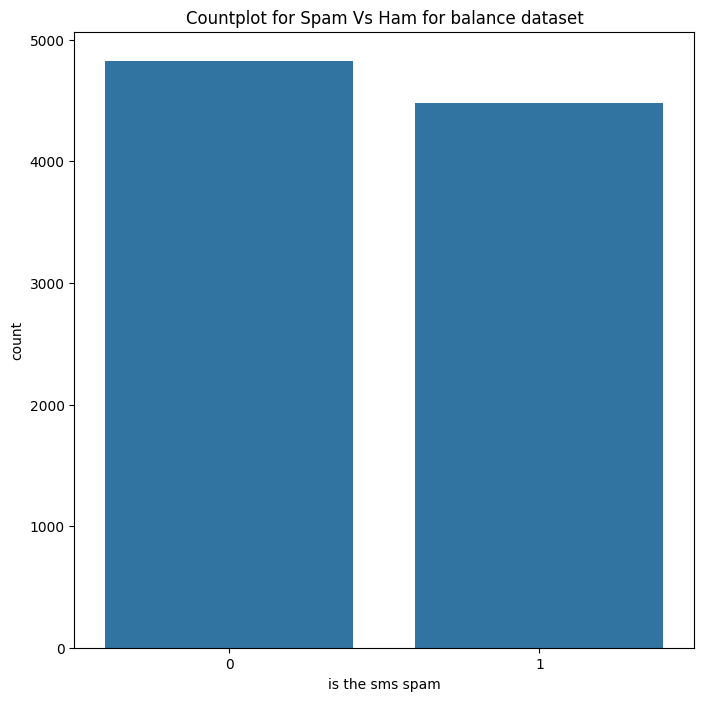

In [23]:
#countplot for spam vs ham for balance dataset

plt.figure(figsize=(8,8))
g=sns.countplot(x='label',data=df)
p=plt.title('Countplot for Spam Vs Ham for balance dataset')
p=plt.xlabel('is the sms spam')

p=plt.ylabel('count')

In [24]:
#creating new feature word_count
df['word_count']=df['message'].apply(lambda x: len(x.split()))

In [25]:
df

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


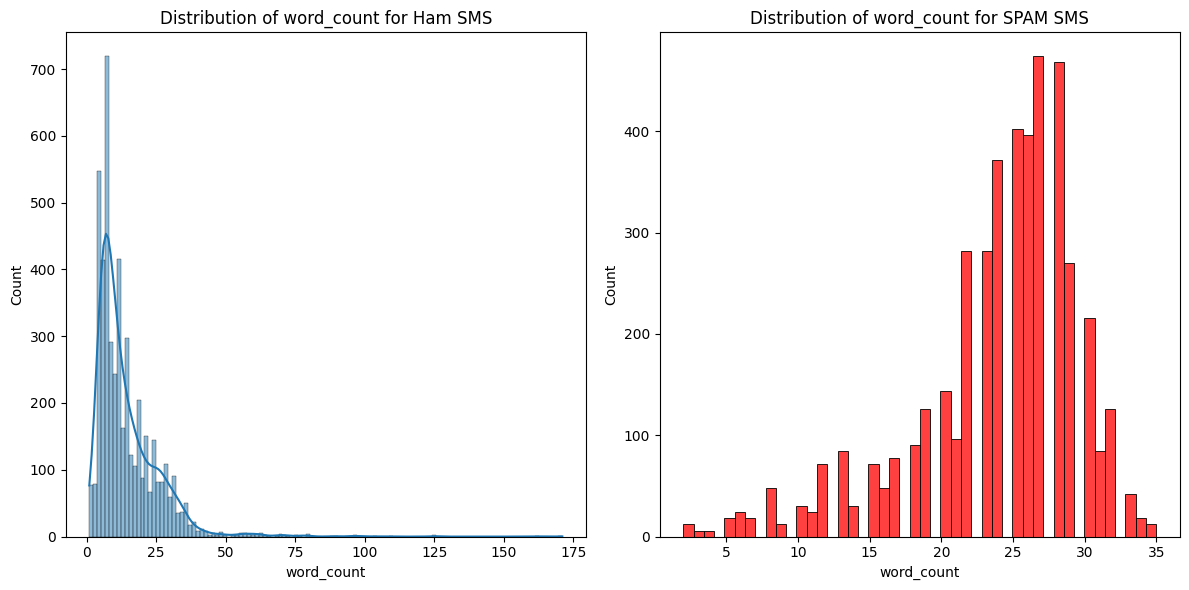

In [26]:
plt.figure(figsize=(12,6))

# (1,1)
plt.subplot(1,2,1)
g = sns.histplot(df[df['label']==0].word_count,kde=True)
p=plt.title('Distribution of word_count for Ham SMS')

#(1,2)
plt.subplot(1,2,2)
g = sns.histplot(df[df['label']== 1 ].word_count,color='red')
p=plt.title('Distribution of word_count for SPAM SMS')

plt.tight_layout()
plt.show()

In [27]:
# creating new feature of containing currency symbols

def currency(data):
    currency_symbols = ["$","€" ,"£","¥","₹"]
    for i in currency_symbols:
        if i in data:
            return 1
        return 0

In [28]:
df['contains_currency_symbols']=df['message'].apply(currency)

In [29]:
df

,label,message,word_count,contains_currency_symbols
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,0
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


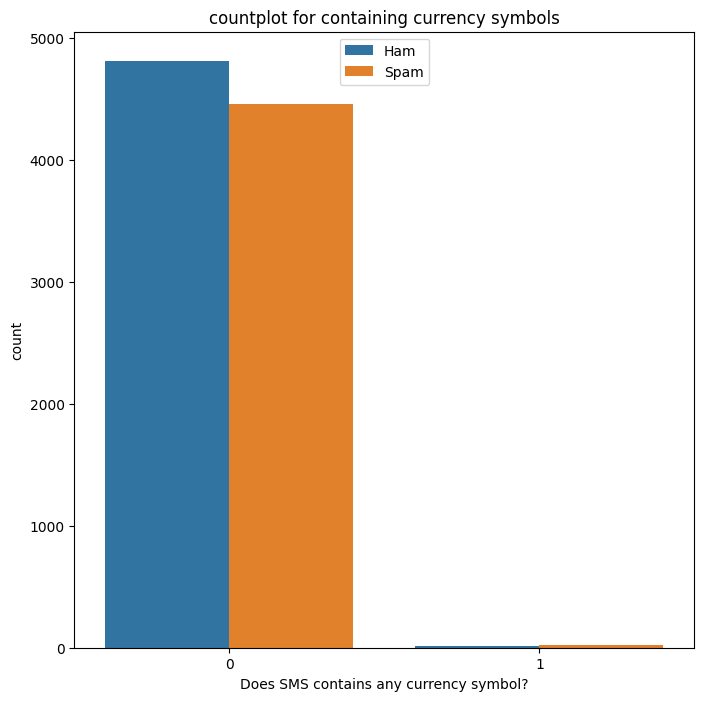

In [31]:
#countplot for contains_currency_symbols
plt.figure(figsize=(8,8))
g=sns.countplot(x='contains_currency_symbols',data=df, hue='label')
p=plt.title('countplot for containing currency symbols')
p=plt.xlabel('Does SMS contains any currency symbol?')
p=plt.ylabel('count')
p=plt.legend(labels=['Ham','Spam'],loc=9)